## Predicting Homeruns by a Player

Based on factors like age, number of games, hits, doubles, triples etc. the model will predict homeruns by a given player

In [1]:
import numpy as np
import pandas as pd

#### Analysing the dataset

In [2]:
dataset = pd.read_csv('Baseball_100.csv')
dataset.head()

,firstname,lastname,age,team,games,at_bats,runs,hits,doubles,triples,homeruns,RBIs,walks,strikeouts,bat_ave,on_base_pct,slugging_pct,stolen_bases,caught_stealing
0,Alfonso,Soriano,24,NYY,156,696,128,209,51,2,39,102,23,157,0.300,0.332,0.547,41,13
1,Miguel,Tejada,26,OAK,162,662,108,204,30,0,34,131,38,84,0.308,0.354,0.508,7,2
2,*Ichiro,Suzuki,28,SEA,157,647,111,208,27,8,8,51,68,62,0.321,0.388,0.425,31,15
3,Derek,Jeter,28,NYY,157,644,124,191,26,0,18,75,73,114,0.297,0.373,0.421,32,3
4,*Garret,Anderson,30,ANA,158,638,93,195,56,3,29,123,30,80,0.306,0.332,0.539,6,4


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   firstname        209 non-null    object 
 1   lastname         209 non-null    object 
 2   age              209 non-null    int64  
 3   team             209 non-null    object 
 4   games            209 non-null    int64  
 5   at_bats          209 non-null    int64  
 6   runs             209 non-null    int64  
 7   hits             209 non-null    int64  
 8   doubles          209 non-null    int64  
 9   triples          209 non-null    int64  
 10  homeruns         209 non-null    int64  
 11  RBIs             209 non-null    int64  
 12  walks            209 non-null    int64  
 13  strikeouts       209 non-null    int64  
 14  bat_ave          209 non-null    float64
 15  on_base_pct      209 non-null    float64
 16  slugging_pct     209 non-null    float64
 17  stolen_bases    

In [4]:
dataset.describe(include='all')

,firstname,lastname,age,team,games,at_bats,runs,hits,doubles,triples,homeruns,RBIs,walks,strikeouts,bat_ave,on_base_pct,slugging_pct,stolen_bases,caught_stealing
count,209,209,209.000000,209,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
unique,176,197,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Mike,Wilson,NaN,TEX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,3,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,28.947368,NaN,102.708134,352.368421,49.779904,93.885167,19.363636,1.971292,11.559809,47.956938,33.511962,63.598086,0.258603,0.323531,0.412622,5.540670,2.583732
std,NaN,NaN,4.003857,NaN,39.982279,168.057892,30.380114,50.895124,11.543056,2.098337,10.394503,31.660049,24.516303,33.877341,0.032497,0.040918,0.079352,7.491631,2.867913
min,NaN,NaN,20.000000,NaN,27.000000,103.000000,6.000000,19.000000,2.000000,0.000000,0.000000,4.000000,2.000000,10.000000,0.163000,0.207000,0.238000,0.000000,0.000000
25%,NaN,NaN,26.000000,NaN,68.000000,196.000000,25.000000,51.000000,9.000000,0.000000,4.000000,21.000000,15.000000,35.000000,0.236000,0.298000,0.363000,1.000000,0.000000
50%,NaN,NaN,28.000000,NaN,108.000000,345.000000,44.000000,89.000000,18.000000,1.000000,8.000000,40.000000,26.000000,58.000000,0.260000,0.322000,0.404000,2.000000,2.000000
75%,NaN,NaN,32.000000,NaN,140.000000,485.000000,71.000000,132.000000,28.000000,3.000000,17.000000,67.000000,46.000000,85.000000,0.282000,0.348000,0.458000,8.000000,4.000000


#### Selecting the numerical features for our input and also the target 'homeruns'

In [5]:
data_numerical = dataset.drop(['firstname','lastname','team'],axis=1)
data_numerical.head()

,age,games,at_bats,runs,hits,doubles,triples,homeruns,RBIs,walks,strikeouts,bat_ave,on_base_pct,slugging_pct,stolen_bases,caught_stealing
0,24,156,696,128,209,51,2,39,102,23,157,0.300,0.332,0.547,41,13
1,26,162,662,108,204,30,0,34,131,38,84,0.308,0.354,0.508,7,2
2,28,157,647,111,208,27,8,8,51,68,62,0.321,0.388,0.425,31,15
3,28,157,644,124,191,26,0,18,75,73,114,0.297,0.373,0.421,32,3
4,30,158,638,93,195,56,3,29,123,30,80,0.306,0.332,0.539,6,4


In [6]:
inputs = data_numerical.drop(['homeruns'],axis=1)
inputs.head()

,age,games,at_bats,runs,hits,doubles,triples,RBIs,walks,strikeouts,bat_ave,on_base_pct,slugging_pct,stolen_bases,caught_stealing
0,24,156,696,128,209,51,2,102,23,157,0.300,0.332,0.547,41,13
1,26,162,662,108,204,30,0,131,38,84,0.308,0.354,0.508,7,2
2,28,157,647,111,208,27,8,51,68,62,0.321,0.388,0.425,31,15
3,28,157,644,124,191,26,0,75,73,114,0.297,0.373,0.421,32,3
4,30,158,638,93,195,56,3,123,30,80,0.306,0.332,0.539,6,4


In [7]:
targets = data_numerical['homeruns']

#### Standardizing all our numerical features - 

In [8]:
X = inputs.to_numpy()
X = (X - X.mean(axis=0))/X.std(axis=0)
X

array([[-1.2386174 ,  1.33608735,  2.04963077, ...,  1.69749907,
         4.74455631,  3.64072276],
       [-0.73789973,  1.48651414,  1.84683379, ...,  1.20484054,
         0.1952624 , -0.20402764],
       [-0.23718205,  1.36115848,  1.75736454, ...,  0.15636212,
         3.40652869,  4.33976829],
       ...,
       [-0.23718205, -1.07074122, -1.4754579 , ..., -1.485833  ,
        -0.60755417, -0.55355041],
       [-0.48754089, -1.74766175, -1.48142252, ..., -1.68794932,
        -0.47375141, -0.90307317],
       [-0.73789973, -1.72259062, -1.48738713, ..., -0.42472231,
        -0.47375141, -0.20402764]])

First we'll take 15 Principal Components and lose no information. Later we'll decide what's the least number of principal components we can choose, losing as little information as possible while alongside reducing the dimensionality of our data.

#### Selecting PCs based on the proportion of Variance explained - 

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15
0,6.905329,-3.317098,1.034466,-0.408256,0.686894,3.540293,1.820497,0.978363,-0.427248,-0.524609,-0.165206,0.351094,0.347274,-0.089172,0.059621
1,4.354051,1.364981,0.009984,-1.464773,-0.859704,1.469716,-0.644934,0.303632,0.362307,0.991703,-0.541063,0.091686,0.466319,-0.103165,0.046444
2,5.689585,-3.848129,2.417138,2.414603,0.514518,0.351694,-0.984289,-0.740317,-0.120720,0.523895,0.233312,0.220820,-0.507247,-0.257433,0.225689
3,4.774285,-0.578487,-0.302052,0.483354,1.338299,1.829146,-1.100832,2.486938,-0.327659,0.628587,0.199069,0.462905,-0.239745,-0.097989,0.029320
4,4.831724,0.621972,0.172816,-0.762222,-2.301342,0.744380,0.649354,-0.176552,0.641678,-0.894124,-0.453743,-0.155488,0.209470,0.042544,0.053640


In [10]:
print(pca.explained_variance_ratio_)

[5.77777891e-01 1.29314504e-01 7.61826819e-02 6.93334954e-02
 4.04702752e-02 3.12610205e-02 2.32054834e-02 2.04627985e-02
 1.20250561e-02 8.52432703e-03 3.87860994e-03 3.14472376e-03
 2.77906339e-03 1.37993963e-03 2.60130374e-04]


Above we can see that first Principal Component(PC1) can describe almost 57.7% variance of our data. Similarly, PC2:12.9%, PC3:7.6%, PC4:6.9%, PC5:4% ... and so on.

If we take the first <b>4 PCs</b> we'll capture around 85% of the variance. Hence, coming down from 15 features to 4 Principal Components, we've drastically reduced the dimensionality of our data, while still retaining around 85% of its variance.

Some might say that why not 90% or 95%, but it eventually depends on the problem in question as to how many principal components one is willing to tradeoff for increased dimensionality. Since in the above problem, the drop from 3rd to 4th component is only 7.6 to around 7, but 4th to 5th is 7 to 4, it seems right to include first 4 components.

#### Selecting PCs based on the Eigenvalues - 

In [11]:
inputs.columns # Getting the names of the columns to convert our Input np Array into a dataframe

Index(['age', 'games', 'at_bats', 'runs', 'hits', 'doubles', 'triples', 'RBIs',
       'walks', 'strikeouts', 'bat_ave', 'on_base_pct', 'slugging_pct',
       'stolen_bases', 'caught_stealing'],
      dtype='object')

In [12]:
X_df =pd.DataFrame(data = X, columns=['age', 'games', 'at_bats', 'runs', 'hits', 'doubles', 'triples', 'RBIs',
       'walks', 'strikeouts', 'bat_ave', 'on_base_pct', 'slugging_pct',
       'stolen_bases', 'caught_stealing'])

In [13]:
corr_matrix=np.matrix(X_df.corr())
print(corr_matrix.trace())
eval, evec = np.linalg.eig(corr_matrix)
print(f"\nEigenvalues: {eval}")
eval_total=eval.sum()
print(f"\nTotal for eigen values: {eval_total}")
print(f"\n Eigen Vector: {evec}")
pct=eval/eval.sum()
print(f"\n Pct: {pct}")
cum_pct=eval.cumsum()/eval.sum()
print(f"\n Cumulative Percentage: {cum_pct}")

[[15.]]

Eigenvalues: [8.66666836e+00 1.93971756e+00 1.14274023e+00 1.04000243e+00
 6.07054127e-01 4.68915308e-01 3.48082251e-01 3.06941978e-01
 1.80375842e-01 1.27864905e-01 3.90195561e-03 2.06990944e-02
 5.81791492e-02 4.71708564e-02 4.16859508e-02]

Total for eigen values: 15.000000000000021

 Eigen Vector: [[-9.82977813e-03  2.37223190e-01 -3.26931914e-01 -8.07597977e-01
  -3.25520550e-01  7.96361812e-03 -2.59631053e-01 -5.27314438e-02
   4.61316794e-02 -4.96380821e-02  3.01034564e-03  6.56495608e-03
  -3.65123688e-02 -4.70457326e-02 -1.10879801e-02]
 [ 3.12775012e-01 -5.58826254e-02 -2.35245846e-01  5.43560821e-02
  -1.89663772e-01  3.03377747e-02  2.10385693e-01  6.09507846e-02
   1.77390447e-01 -1.59868601e-01 -1.02147988e-01  3.64158825e-01
   5.82832026e-01  2.91944988e-01  3.61783940e-01]
 [ 3.21581019e-01 -8.69286549e-02 -1.69167953e-01  8.08009419e-02
  -2.14501664e-01 -5.31958684e-02  1.60422600e-01  1.16444073e-02
   3.69401917e-02 -1.34984718e-01  6.61567263e-01 -5.56749

As seen above, the top Eigenvalues are - 8.6, 1.9, 1.1, 1.04, 0.6, 0.4, 0.3 and so on.
Eigenvalues being the coefficient and representative of the magnitude of eigenvectors, we can say that the first <b>4 eigenvalues</b> stand out to be bigger than the remaining 11.
Alos, above we can see the Cumulative Percentage of the data that first 4 vectors are describing is around 85.26%. Hence <b>4 PCs</b> can be chosen.

#### Selecting PCs based on the Scree Criterion - 

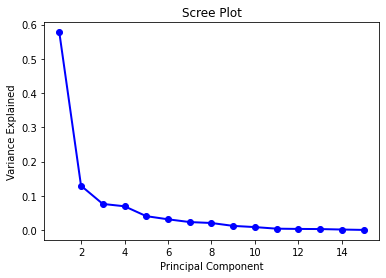

In [14]:
import matplotlib.pyplot as plt

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

From the above Scree plot, we can say that the elbow(scree) is around the <b>3rd component</b> and the graph seems to level off after that. But since, there is a visible drop after the 4th component, it can be tricky to exactly interpret how many Principal Components the scree plot is suggesting.

### Training the model with 4 PCs and evaluating MSE

In [15]:
pca = PCA(n_components=4)
pca.fit(X)
P = pca.transform(X)
P = pd.DataFrame(P)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_pca, X_test_pca, y_pca, y_test_pca = train_test_split(P, targets, test_size=0.2, random_state=30)

reg = LinearRegression()
reg.fit(X_pca,y_pca)

y_pred = reg.predict(X_test_pca)
mean_squared_error(y_test_pca,y_pred)

15.560022606773362

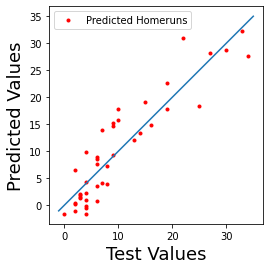

In [17]:
ax = plt.axes()
ax.set_aspect('equal')
plt.plot(y_test_pca, reg.predict(X_test_pca), 'r.', label = "Predicted Homeruns")
plt.xlabel("Test Values", fontsize=18)
plt.legend(loc="best")
plt.ylabel("Predicted Values", fontsize=18)
point1 = [-1, -1]
point2 = [35, 35]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values)
plt.show()

We can see that our linear regression model is predicting around the angle of 45 Degrees